In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Linear

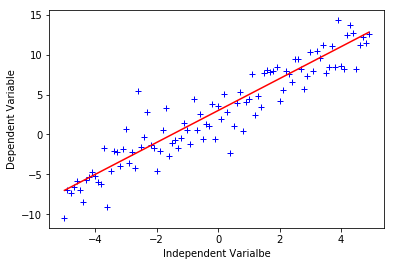

In [6]:
x = np.arange(-5.0, 5.0, 0.1)

y = 2*x +3
y_noise = 2*np.random.normal(size=x.size)
ydata = y+ y_noise

plt.plot(x,ydata, 'b+')
plt.plot(x,y,'r')
plt.ylabel("Dependent Variable")
plt.xlabel('Independent Varialbe')
plt.show()

# Cubic

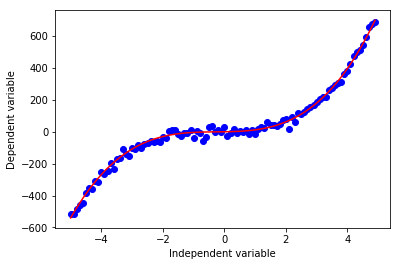

In [12]:
x = np.arange(-5,5,0.1)
y = 3*x + 4*x**2 +5*x**3
y_noise = 20*np.random.normal(size=x.size)
y_data = y + y_noise

plt.plot(x,y_data,'bo')
plt.plot(x,y,'r')
plt.xlabel('Independent variable')
plt.ylabel('Dependent variable')
plt.show()

# Quadratic

[]

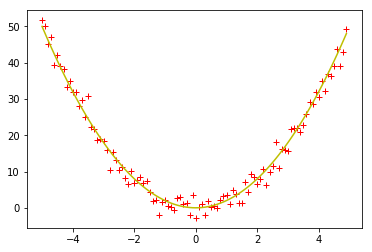

In [22]:
x = np.arange(-5,5,0.1)
y = 2*np.power(x,2)
y_noise = 2 * np.random.normal(size=x.size)

y_data = y+ y_noise

plt.plot(x,y_data, 'r+')
plt.plot(x,y, 'y')
plt.show()


# Exponential

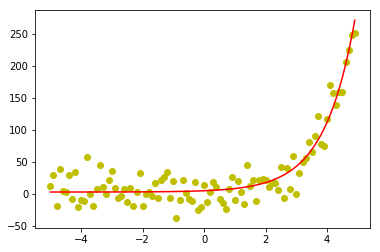

In [34]:
x = np.arange(-5,5,0.1)
y = 3 + 2*np.exp(x)
y_noise = 20 * np.random.normal(size=x.size)
y_data = y + y_noise

plt.plot(x,y_data, 'yo')
plt.plot(x, y, 'r')

# Logarithmic

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in log
  from ipykernel import kernelapp as app


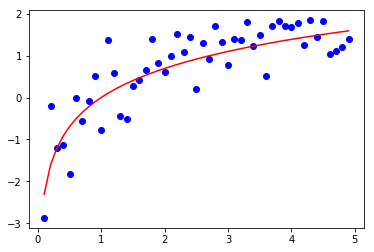

In [32]:
x = np.arange(-5,5, 0.1)
y = np.log(x)
y_noise = 0.5* np.random.normal(size=x.size)
y_data = y+ y_noise

plt.plot(x,y_data, 'bo')
plt.plot(x,y, 'r')
plt.show()

# Sigmoidal

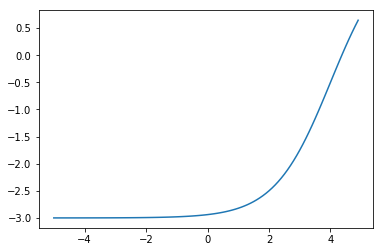

In [37]:
x = np.arange(-5,5,0.1)
y = 2 - 5/(1+ np.power (3, x-4))
plt.plot(x,y)
plt.show()

# Non-Linear Regression Example

In [38]:
import numpy as np
import pandas as pd

#downloading dataset
!wget -nv -O china_gdp.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/china_gdp.csv
    

2020-06-29 21:17:46 URL:https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/china_gdp.csv [1218/1218] -> "china_gdp.csv" [1]


In [40]:
df = pd.read_csv('china_gdp.csv')
df.head(10)

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10
5,1965,6.970915e+10
6,1966,7.587943e+10
7,1967,7.205703e+10
8,1968,6.999350e+10
9,1969,7.871882e+10


<function matplotlib.pyplot.show(*args, **kw)>

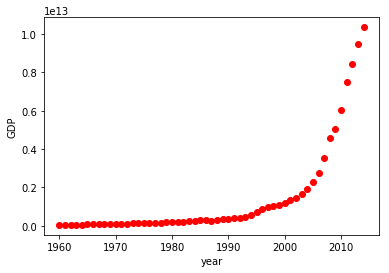

In [66]:
x_data, y_data = df['Year'], df['Value']
plt.plot(x_data, y_data, 'ro')
plt.ylabel('GDP')
plt.xlabel('year')
plt.show

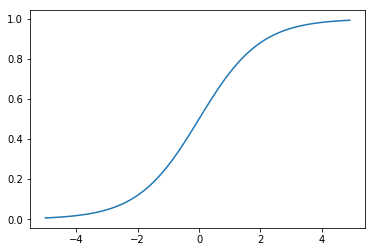

In [67]:
# Choose a model, e.g. 
x = np.arange(-5,5,0.1)
y = 1 / (1+np.exp(-x))

plt.plot(x,y)

In [69]:
# build the model:
def sigmoid(x, Beta_1, Beta_2):
    y = 1 / (1 + np.exp(-Beta_1 * (x-Beta_2)))
    return y

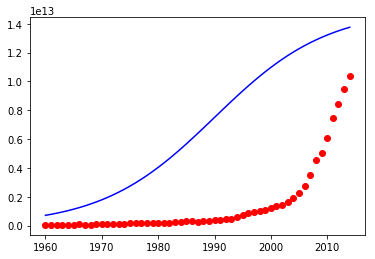

In [70]:
beta_1 = 0.1
beta_2 = 1990

Y_pred = sigmoid(x_data, beta_1, beta_2)

plt.scatter(x_data, y_data, color ='r')
plt.plot(x_data, Y_pred*15000000000000, 'b')

In [71]:
# normalize data:
xdata = x_data / x_data.max()
ydata = y_data / y_data.max()
xdata.head()

0    0.973188
1    0.973684
2    0.974181
3    0.974677
4    0.975174
Name: Year, dtype: float64

In [72]:
# find best fit:
from scipy.optimize import curve_fit
popt, pcov = curve_fit(sigmoid, xdata, ydata)
print( 'beta_1 = %f, beta_2 =%f' % (popt[0], popt[1]))

beta_1 = 690.453017, beta_2 =0.997207


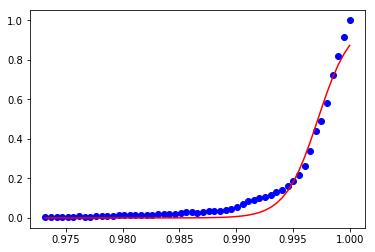

In [76]:
y = sigmoid(xdata, *popt)
plt.plot(xdata, ydata, 'bo')
plt.plot(xdata, y, 'r')

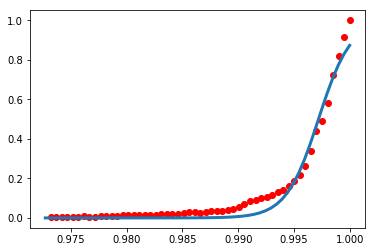

In [78]:
# plot result:

x = np.linspace(1960, 2015, 55)
x = x/max(x)
y = sigmoid(x, *popt)
plt.plot(xdata,ydata, 'ro', label='data')
plt.plot(x,y, linewidth = 3, label ='fit')

## calculate accuracy of model

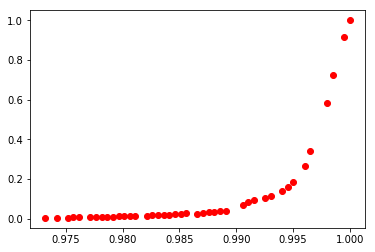

In [84]:
# split data into tran/test:
msk = np.random.rand(len(df)) <0.8
train_x = xdata[msk]
test_x = xdata[~msk]
train_y = ydata[msk]
test_y = ydata[~msk]

plt.plot(train_x, train_y, 'ro')

In [85]:
# build model: 
popt, pcov = curve_fit(sigmoid, train_x, train_y)

In [86]:
# Predict: 
y_hat = sigmoid(test_x, *popt)

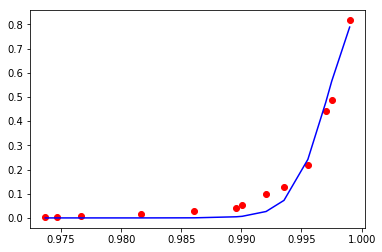

In [87]:
# plot: 
plt.plot(test_x, test_y, 'ro')
plt.plot(test_x, y_hat, 'b')

In [91]:
# Evaluation: 
print("Mean absolute error:  %.2f" %np.mean(np.absolute(y_hat -test_y)))
print("Residual sum of squares(MSE): %.2f" % np.mean((y_hat - test_y)**2))

from sklearn.metrics import r2_score
print("R2-score: %.2f" % r2_score(y_hat, test_y))

Mean absolute error:  0.03
Residual sum of squares(MSE): 0.00
R2-score: 0.97
